<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%201/Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forest Cover Type

This dataset looks at the ecological data on 4 areas from Roosevelt National Forest of northern Colorado. Sampling forest cover type for a 30x30 meter areas, determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. These areas have minimal human disturbance, in order to provide insight on ecological data over forest management.

This dataset is leveraged to predict categorical values of trees, eliminating confounding factors of human interference, in order to predict a tree species, based on elevation, slope, soil type, cover type, shadow coverage, and local topography.

The insights from this data are useful for understanding the ecology of tree species in the areas sampled were pulled from (Roosevelt National Forest of north Colorado). Trees are an important part of a healthy ecosystem in earth, as they store carbon dioxide, which helps to slow global warming.

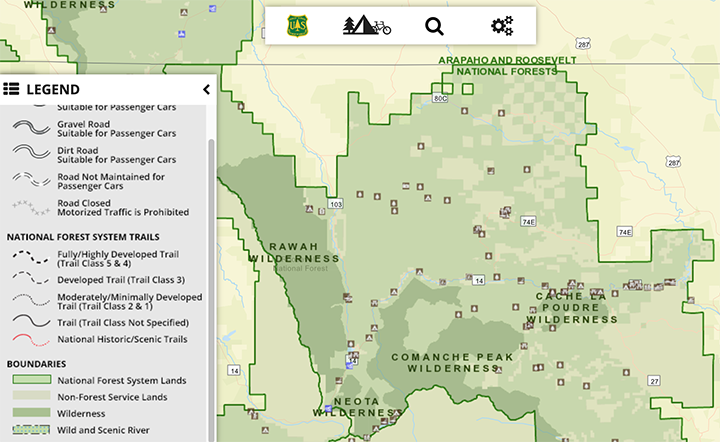

As for primary major tree species in these areas:
### Neota 
- spruce/fir (type 1)


### Rawah and Comanche Peak
- lodgepole pine (type 2)
- spruce/fir and aspen (type 5)

### Cache la Poudre 
- Ponderosa pine (type 3)
- Douglas-fir (type 6)
- Cottonwood/willow (type 4)

### Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University. (source: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset)


In [1]:
# Import packages

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# upload files from computer to google colab

forest_cover_type = files.upload()

Saving covtype 3.csv to covtype 3.csv


In [7]:
# read the files into a dataframe

forest_cover_type = pd.read_csv('covtype 3.csv') 

In [8]:
# read the files into a dataframe

print(forest_cover_type.shape)
forest_cover_type.head()

(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [9]:
# data type
print(forest_cover_type.info())
print('\n')
# basic summary stats
print(forest_cover_type.describe())
print('\n')
# count the nulls
print(forest_cover_type.isnull().sum())
print('\n')
# count the frequency of each outcome
print(forest_cover_type['Cover_Type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

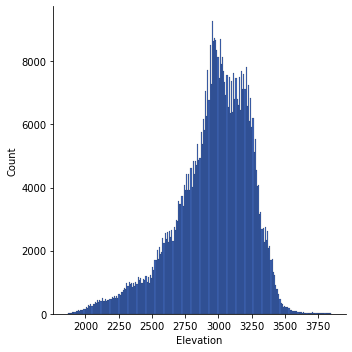

In [10]:
# distribution plot for elevation in SMU Blue
sns.displot(forest_cover_type['Elevation'], color = '#0033A0')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


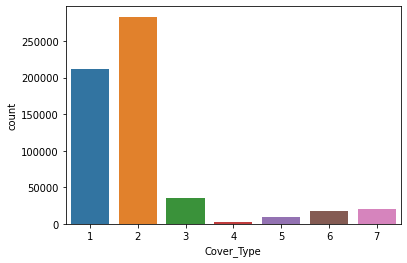

In [11]:
# count plot for cover type 
# check with value counts above
sns.countplot(forest_cover_type['Cover_Type'])

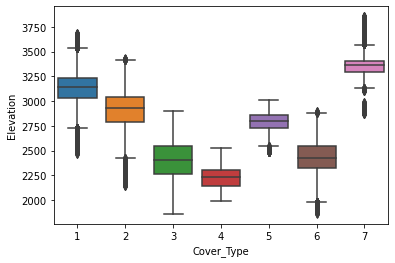

In [12]:
# box plots for elevation vs cover type
sns.boxplot(x = 'Cover_Type', y = 'Elevation', data = forest_cover_type)

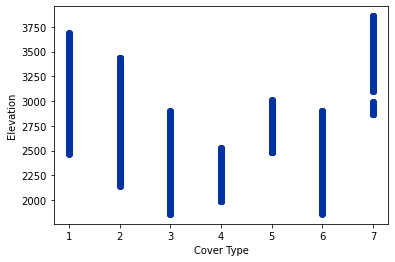

In [13]:
# scatter plot of above
plt.scatter(forest_cover_type['Cover_Type'], forest_cover_type['Elevation'], color = '#0033A0')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

In [ ]:
# make list of continuous variables
continuous_variables = ['Elevation', 
                        'Aspect', 
                        'Slope', 
                        'Horizontal_Distance_To_Hydrology', 
                        'Vertical_Distance_To_Hydrology',
                        'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon',
                        'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points',
                        'Cover_Type']

# use list to make df
continuous_variables_df = forest_cover_type[continuous_variables]

# show the df
continuous_variables_df

In [ ]:
# subset df to make binary categorical
# second number not inclusive
Wilderness_Area = forest_cover_type.iloc[:, 10:14]

#
Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)
Wilderness_Area


# subset df to make binary categorical
# second number not inclusive
Soil_Type = forest_cover_type.iloc[:, 14:54]

#
Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)
Soil_Type
     

In [ ]:

# only keep the new column
Soil_Type = Soil_Type[['Soil_Type']]
Soil_Type

Wilderness_Area = Wilderness_Area[['Wilderness_Area']]
Wilderness_Area

In [ ]:
# Add new columsn to df
forest_cover_type['Soil_Type'] = Soil_Type
forest_cover_type['Wilderness_Area'] = Wilderness_Area

# check to see if worked
forest_cover_type

In [ ]:
# delete superfluous columns now that new columsn are added
forest_cover_type.drop(forest_cover_type.iloc[:, 10:54], 
                       axis = 1, 
                       inplace = True)
forest_cover_type

In [ ]:

# Correlation df
cormat = forest_cover_type.corr()
# Round to two decimals
round(cormat,2)

# Maybe try to subset this a little?
# heatmap of the correlations
sns.heatmap(cormat);

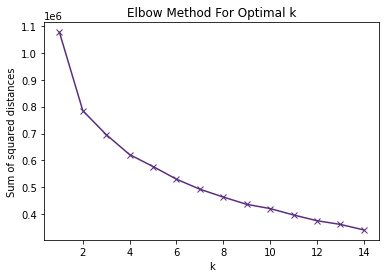

In [14]:
# takes about 1.5 minutes

# find out the best number of clusters
mms = MinMaxScaler()
data_transformed = mms.fit_transform(forest_cover_type)

Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

# plot the data to better identify how many clusters we should use
plt.plot(K, Sum_of_squared_distances, 
         'bx-', 
         color = '#5A2D81')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

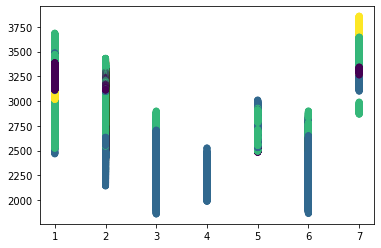

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(forest_cover_type)

plt.scatter(forest_cover_type['Cover_Type'], 
            forest_cover_type['Elevation'], 
            c = kmeans.labels_)
plt.show()

In [16]:
X = forest_cover_type.iloc[:, 0:55].values
y = forest_cover_type.iloc[:, 54].values

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


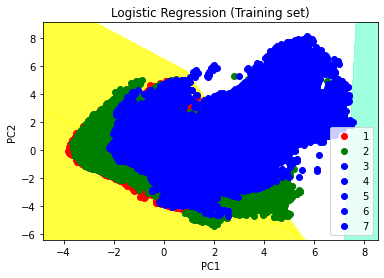

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# performing preprocessing part
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
# Below is taken from https://www.geeksforgeeks.org/principal-component-analysis-with-python/
explained_variance = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
  
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()

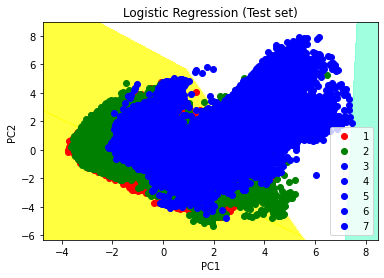

In [18]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_test, y_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()